# Iris&mdash;an introduction to supervised learning using scikit-learn

Our first notebook will explore the well-known "iris" dataset. This is a simple dataset with only 150 observations and 4 features:

   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   
The objective is quite simple: **predict the species to which each observation belongs**. What makes the problem more interesting is that the classes (there are 3) are *not all perfectly linearly separable* from one another (one class is from the other 2, but the others are not). That is, you cannot draw a linear boundary between each species' feature space.

The prediction targets:

  0. Iris Setosa
  1. Iris Versicolour
  2. Iris Virginica
  
### Background


This is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day (see Duda & Hart, for example).

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    
    
#### References

- Fisher,R.A. "The use of multiple measurements in taxonomic problems"
 Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
 Mathematical Statistics" (John Wiley, NY, 1950).
- Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
 (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
- Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
 Structure and Classification Rule for Recognition in Partially Exposed
 Environments".  IEEE Transactions on Pattern Analysis and Machine
 Intelligence, Vol. PAMI-2, No. 1, 67-71.
- Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
 on Information Theory, May 1972, 431-433.
- See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
 conceptual clustering system finds 3 classes in the data.
- Many, many more ...

# Loading and Manipulating Data with Pandas

Our first step is simply to load our data. Since we're using iris, we can use sklearn's built-in method: [`load_iris`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# load the data
iris = load_iris()
X = pd.DataFrame.from_records(data=iris.data, columns=iris.feature_names)
X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Observing the target

What is our target for this dataset?

In [2]:
y = iris.target_names[iris.target]
print(y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

## Manipulating/visualizing data with Pandas

There's a fantastic Pandas tutorial out there ([10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)), but we'll go over a few of the basics so the syntax is easily understood here

#### Selecting columns:

In [3]:
X[['sepal length (cm)', 'sepal width (cm)']].head(3)  # show two cols, 3 rows

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2


In [4]:
assert X[X.columns] is not X

#### Select by index:

In [5]:
X.loc[130]

sepal length (cm)    7.4
sepal width (cm)     2.8
petal length (cm)    6.1
petal width (cm)     1.9
Name: 130, dtype: float64

#### Select by mask

In [6]:
X.loc[y == 'virginica'].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
100,6.3,3.3,6.0,2.5
101,5.8,2.7,5.1,1.9
102,7.1,3.0,5.9,2.1


#### Add a column:

In [7]:
X_copy = X.copy()
X_copy['target'] = y
X_copy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Apply a function to columns:

In [8]:
X_str = X_copy.apply(lambda col: col.astype(str))
X_str.dtypes

sepal length (cm)    object
sepal width (cm)     object
petal length (cm)    object
petal width (cm)     object
target               object
dtype: object

#### Group by categorical columns & apply a function to groups:

In [9]:
groups = X_copy.groupby('target')
groups.apply(lambda group: group['sepal length (cm)'].max())

target
setosa        5.8
versicolor    7.0
virginica     7.9
dtype: float64

#### Visualize data

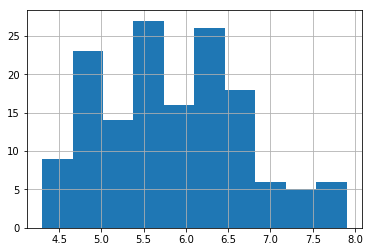

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

X_copy['sepal length (cm)'].hist()

target
setosa        Axes(0.125,0.125;0.775x0.755)
versicolor    Axes(0.125,0.125;0.775x0.755)
virginica     Axes(0.125,0.125;0.775x0.755)
Name: sepal length (cm), dtype: object

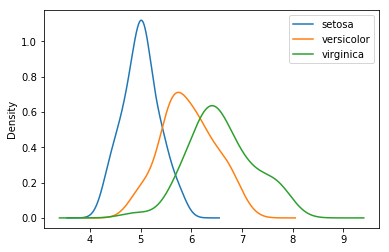

In [11]:
groups['sepal length (cm)'].plot.density(legend=True)

#### Counting values (useful for categorical variables)

In [12]:
X_copy.target.value_counts()

setosa        50
virginica     50
versicolor    50
Name: target, dtype: int64


### Adding a twist&mdash;missing values

For those who are familiar with iris, you'll know there are no missing values. However, since the purpose of this course is to address practical ML, dealing with missing values is going to be a common occurrence. We'll introduce a small amount of missing values in order to discuss strategies for imputing them later.

In [13]:
from sklearn.utils import check_random_state
import numpy as np

# get a random state for repeatability
seed = 42
random_state = check_random_state(seed)

# create a mask
missing_pct = 0.05
missing_mask = random_state.rand(*X.shape) < missing_pct

# assign the mask as missing values
X = X.where(~missing_mask, other=np.nan)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,NaN,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Backing up: ML objective

What's the point? Machine learning is a hot buzzword, but is largely misunderstood. Many companies know they should be using it, but have no idea where to use it or what it can do. There are two broad umbrellas we will use to describe different machine learning problems:

1. __Supervised machine learning__
    <br/>
    <br/>
    Mathematically put, given $X \in \mathbb{R}^{m \times n}$, predict some vector $y$. More concretely, we have some data (a matrix we'll call $X$), and we have a "target" (a vector we'll call $y$). We want to find some function, $h$ such that given a new sample, $x_{n}$, we can predict the corresponding target:
    
    $$h(x_{n}) = \hat{y_{n}}$$
    
    Supervised learning occurs when the algorithm is presented with ground truth (the actual target), and it's able to learn a decision function with respect to the target. In the real world, infants observe all sorts of items. When they encounter a carrot for the first time, they have a parent available to inform them of the "target" class, carrot. Thus, the child might learn rules:
    
        If orange, then carrot
        
    <img alt="Carrot1" src="img/carrot1.png" style="width:250px;"/>
        
    However, imagine the child is then shown a block of sharp cheddar cheese. With such a weak decision function, it incorrectly labels the cheese a carrot and is corrected. New rules may emerge here:
    
        If orange and pointy and leafy, then carrot
        If orange and soft and smelly, then cheese
        
    <img alt="Carrot2" src="img/carrot2.png" style="width:350px;"/>
        
    Therefore, supervised learning occurs when ground truth is available to guide the learning of the algorithm.

    <br/>
2. __Unsupervised machine learning__
    <br/>
    <br/>
    Unsupervised learning can best be summarized as pattern recognition. This is the term for algorithms which do not predict a new variable, but solely learn about the data on hand. Without a target, ML tasks can *only* be unsupervised. E.g.,
    
    <img alt="Pattern" src="img/maxresdefault.jpg" style="width:250px;"/>

### Back to the data & the problem at hand...

The purpose: predict the species of iris given several attributes about each observation. __*But how do we know if our model will do well on new data?*__

# The first thing you do in ML&mdash;SPLIT YOUR DATA!

# Splitting the Data (and common pitfalls)

The absolute *most* important first step to machine learning problems is to properly split your data! Why? Model fit statistics are not a good guide to how well a model will predict on new data. In order to reliably assert how well the model will perform on new data, we need to simulate unseen data. Therefore we "split" our data into a "training set" and a "testing" set.

We need all exploratory work, transformations and models to be fit on our training set so that they can later be applied to our test set. The test set will only be introduced to our final model __ONCE__ as a means of model selection and as a litmus test as to whether our model will perform to business requirements.

Not properly splitting your data can lead to a number of problems including (but not limited to):

- Over/under-fitting your data
- Distributional differences between train/test splits
- Factor levels present in test split but not train

Things to consider when splitting your data:

- Are there categorical features? If so, do all factor levels exist between splits? How about class imbalance?
- Natural ordering to your data?
  - If we split without a shuffle and it's time-series data, what might happen?
  - Imagine we take the first 100 (~66.7% of the data) observations as the training set. What will happen?

    Train set (`species={'setosa', 'versicolor'}`):

    <img src="img/bad_train1.png" alt="Bad train set1" style="width: 500px;"/>

    Test set (`species={'virginica'}`):

    <img src="img/bad_test1.png" alt="Bad test set1" style="width: 500px;"/>

    __Uh oh! The model will be fit on only two classes, and will get everything incorrect on the test set!__
- Is it reproducible?
- How much is enough for each set?
  - Too many examples in train and not enough in test means we don't know how well the model generalizes to new data
  - Too few examples in train and too many in test could lead to under-fitting

In [14]:
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, stratify=y)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
130,7.4,2.8,6.1,1.9
122,7.7,2.8,6.7,2.0
81,5.5,2.4,3.7,1.0
71,6.1,NaN,4.0,1.3
89,NaN,2.5,4.0,1.3


In [15]:
y_train[:5]

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'versicolor'], 
      dtype='<U10')

### *From here on out, all procedures must be applied to the train set only!*

Now that we've split our data, it's time to perform some descriptive and exploratory analytics.



### Summarizing data with Pandas

Before we dive into our work, it's valuable to take a look at the data we're working with. Consider the following questions:

  - Is there any data missing?
  - Are there any significant outliers?
  - Are there any redundant features?
  - What is the scale of the features?
  - Are there any categorical features? Or are they all numeric?
  - What could a significant difference in mean & median indicate?

In [16]:
def summarize(data):
    """Create a summary of the input data including min, max,
    mean, median, num obs missing, IQR, etc.
    
    Parameters
    ----------
    data : pd.DataFrame
        The input dataframe to summarize.
    """
    summ = data.describe()
    
    # get the median, name it
    med = data.median()
    med.name = "median"
    
    # append the median row
    summ = summ.append(med, ignore_index=False)
    
    return summ

summarize(X_train)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,103.000000,107.000000,105.000000,105.000000
mean,5.866990,3.066355,3.726667,1.161905
std,0.857652,0.445511,1.772290,0.784021
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
median,5.800000,3.000000,4.200000,1.300000


### What have we observed about `iris`?

1. There are no categorical features
2. There are 150 observations in the data, and none of the features are fully present (i.e., missing values in each)
3. The `petal length (cm)` feature displays a much higher median than mean&mdash;what could that indicate?

## Exploratory data analysis

In the EDA section, we focus on purely descriptive statistics. We'll look at some visualizations as well. It's worth noting that "visual analytics" can't always be performed on data, especially if it's very high dimensional.

#### Visualizing data with Seaborn or Matplotlib

In iPython notebooks, make sure to use the magic `%matplotlib inline` command!

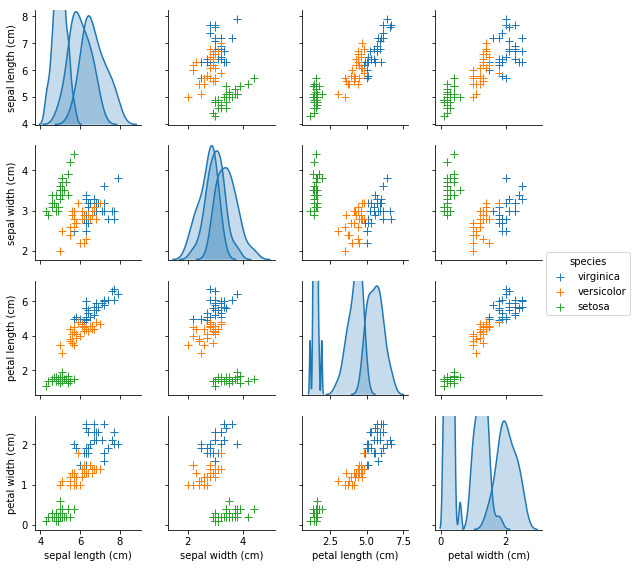

In [17]:
import seaborn as sns
%matplotlib inline

def pairplots(data, target):
    # need to append target
    data = data.copy()
    data['species'] = target.tolist()
    
    # get rid of NA to avoid warnings in seaborn
    data = data.dropna()
    
    # make a KDE pairplot
    sns.pairplot(data, diag_kind="kde", markers="+",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 diag_kws=dict(shade=True), hue='species',
                 size=2)
    
pairplots(X_train, y_train)

Notice the distributional overlaps between different species' features. `setosa` is perfectly linearly separable (meaning you can draw a line to separate classes) from the other two species, but `virginica` and `versicolor` are not.

## What about multi-collinearity?

In [18]:
# correlation matrix
corr = X_train.corr()

# color map (https://stackoverflow.com/questions/39409866/correlation-heatmap)
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
           ]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


## Transformers

Transformers allow us to alter the input data in a way that prepares it for use in a machine learning algorithm. Scikit-learn includes many built-in transformers, but also provides a handy interface called the `TransformerMixin` which will allow us to design custom transformers as needed. Examples of common transformers include:

- The `Imputer`, which will fill in missing values in the data subject to a user-defined strategy. This is typically a first-step in the pipeline A common one is to fill in the missing values in a feature with the feature's mean, like so:

    <img src="img/impute.png" alt="Mean imputation" style="width: 700px;"/>

    However, there are several setbacks to using this strategy. For instance, what if&mdash;much as we see for `petal length (cm)`&mdash;the distribution of the feature is skewed or non-normal? Mean might not be a good measure of central tendency. Moreover, what if the feature is categorical? Using mean would not make sense. Alternatives include "median," or even using a classifier on the present features to impute missing values.


- The `Scaler`, which will bring all of the data into the same scale (which is important for some techniques). This can be important in situations where different units across features may impact covariance matrices or distance matrices (clustering, SVM, PCA, etc.). The objective is to center each feature with mean 0 and standard deviation 1:

    <img src="img/scale.png" alt="scaling" style="width: 800px;"/>


- Feature selection or data transformations like [`PCA`](https://en.wikipedia.org/wiki/Principal_component_analysis), [`Factor Analysis`](https://en.wikipedia.org/wiki/Factor_analysis), etc. These techniques either drop features subject to some test (F-test, for instance) or reduce the feature space via matrix factorization techniques.

    <img src="img/pca.png" alt="PCA" style="width: 700px;"/>


- Feature engineering/extraction. Sometimes a more informative feature might be some kind of combination of other features. For instance, consider a (made up, but very realistic) situation where we have sensor data from heavy machinery. A high friction part has been failing recently, and is very expensive to fix in the field. If we fix in preemptively in the shop in down hours, we can save lots of money and time. Naturally, we want to build a machine learning algorithm to predict when the part is likely to fail, but we need to determine which variables might be informative for a model. We know the part is high-friction and that thermal energy expenditure likely would prove a very informative feature. Therefore, we could design a custom `TransformerMixin` that would compute the lifetime thermal energy expenditure for the part, which would be a feature we then feed into the model. Feature engineering transformers generally resemble the following:

    <img src="img/feat_ext.png" alt="Feature engineering" style="width: 600px;"/>
    
## `fit` vs. `predict`/`transform`

There are two stages to every estimator or transformer:
1. `fit`
2. `predict`/`transform`

Before an estimator can be `fit`, however it needs to be initialized. All estimators in scikit-learn adhere to the following interface:

```python
# initialize (but do not fit) the estimator
estimator = SomeEstimator(*args, **kwargs)
```


Once initialized, and before an estimator can predict or transform, it needs to have been fitted. In order to understand how the different stages work, think of an estimator as a nascent brain&mdash;it knows nothing! The `fit` procedure is the process by which the "brain" is presented with examples (training data) and labels in order for it to learn. The more data it's presented, generally, the more it's able to abstract patterns from the data into better hypotheses about the target. The `fit` process is *only* performed on the training data.

For any given estimator in scikit-learn, the signature for fitting a model is the following:

```python
estimator.fit(X_train, y_train)  # returns self
```

After fitting a model, you can generate predictions (for __estimators__) or transform new data (for __transformers__):

```python
# for a model:
predictions = estimator.predict(X_test)

# for a transformer:
transformed_data = transformer.transform(X_test)
```

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class MeanCenter(BaseEstimator, TransformerMixin):
    def __init__(self, col):
        self.col = col
        
    def fit(self, X, y=None):
        self.mean_ = X[self.col].mean()
        return self
    
    def transform(self, X):
        # ensure the transformer has been fit
        check_is_fitted(self, 'mean_')
        
        # always copy the input frame - we don't want to
        # impact the original frame in place
        X = X.copy()
        col = self.col
        X[col] = X[col] - self.mean_
        return X

In [20]:
mc = MeanCenter(col='sepal width (cm)').fit(X_train)
mc.transform(X_train).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
130,7.4,-0.266355,6.1,1.9
122,7.7,-0.266355,6.7,2.0
81,5.5,-0.666355,3.7,1.0
71,6.1,NaN,4.0,1.3
89,NaN,-0.566355,4.0,1.3


## Pipelines

When developing a machine learning model (and all of in its stages), it's important to think about what will happen to the new data that gets passed in. We should be developing a pipeline through which tomorrow's data can easily pass. The input is raw data, and the output is predictions. The interim stages are called __transformers__, and the final stage is our __estimator__ (ML algorithm).

Here is a (very simple) example of what a pipeline might look like:

<img src="img/pipeline.png" alt="Pipeline example" style="width: 750px;"/>

### Planning our pipe

Since iris is such a well-put-together dataset, there are not many stages in the pipeline we need to address. However, there is one we absolutely need to handle because of the missing values&mdash;imputation. The last stage of the pipeline will be the __estimator__.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

# the pipeline takes 1 argument: a single list of length-2 tuples, 
# in the form of: (name, Estimator)
stages = [
    ('impute', Imputer(strategy="median"))
]

pipe = Pipeline(stages)

### Fit & transform input data

In [22]:
# If a pipeline ends with an Estimator, it can transform (through all stages 
# except the estimator) OR predict (all the way through). If the pipeline only
# contains transformers, it cannot predict--it can only transform
pipe.fit(X_train, y_train)

# let's take a look at the transformed data
pipe.transform(X_train)[:5]

array([[ 7.4,  2.8,  6.1,  1.9],
       [ 7.7,  2.8,  6.7,  2. ],
       [ 5.5,  2.4,  3.7,  1. ],
       [ 6.1,  3. ,  4. ,  1.3],
       [ 5.8,  2.5,  4. ,  1.3]])

Notice that the pipeline takes a matrix of 4 features and returns a its transformed features.

**This is our new input matrix!**

## Building a baseline model

Now that we've covered how to build a pipeline, it's time to add an estimator to the mix and start building models!

In [23]:
from sklearn.ensemble import RandomForestClassifier

# function to build the pipeline
def build_pipe(est, est_name='clf'):
    return Pipeline([
            ('impute', Imputer(strategy='median')),
            (est_name, est)
        ])

# add the estimator to the end of the stages and fit a new pipeline
pipe = build_pipe(RandomForestClassifier(random_state=seed))
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('impute', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impu...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])

#### Before going further... 

Before progressing, we need to talk about two very important concepts in machine learning:

- [__Bias/variance trade-off__](https://en.wikipedia.org/wiki/Bias–variance_tradeoff)
    - The bias is error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
    - The variance is error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).
    
    Consider a usecase wherein we wish to predict membership of a point in one of two classes ("pluses" and "minuses") using a *k*-Nearest-Neighbor classifier. That is, for the *k* nearest points (generally an odd amount), assign membership to the class most represented:
    
    <br/>
    <img src="img/preknn.png" alt="pre-knn" style="width: 400px;"/>
    <br/>
    
    **Over-fitting (high variance)**&mdash;for $k=1$, the model becomes so sensitive to noisy fluctuations in the data that its classification power is brittle (i.e., not robust). The model can be considered "over-fit," meaning high variance.
    
    <br/>
    <img src="img/overfitknn.png" alt="overfit-knn" style="width: 400px;"/>
    <br/>
    
    **Under-fitting (high bias)**&mdash;for $k=17$, the model becomes so *in*sensitive to the most relevant features (i.e., it's equally weighting distances from relatively far out neighbors) that it becomes a numbers game: if there are more "minus" records and as $k$ approaches $m$, the number of records, we're guaranteed to vote in favor of the majority class. This is high bias.
    
    <br/>
    <img src="img/underfitknn.png" alt="underfit-knn" style="width: 400px;"/>
    <br/>
    

- [__Cross validation__](https://en.wikipedia.org/wiki/Cross-validation_%28statistics%29)

    Given only a train/test set, and under the restriction that your test set may only be used __once__ as a model selection measure (lest we [*p*-hack](https://en.wikipedia.org/wiki/Data_dredging)), we can't get a very good estimate of how our model will perform on a dataset its never before seen. Cross validation helps us alleviate this problem. The theory behind cross-validation is that further splitting the training set into fragments (*folds*), and fitting multiple models, evaluating against the left-out training set fold will give us a better idea of how the model will generalize. Cross-validation is generally used to select model hyper-parameters, which are then fit against the entire training set. Here is an example of *k*-fold cross validation:
    
    <br/>
    <img src="img/cv.png" alt="cross-validation" style="width: 800px;"/>
    <br/>
    
    After fitting three models across different partitions of the training data and scoring each held-out fold, we might get scores resembling the following:

        (0.981, 0.939, 0.915)
    
    From which we get a mean score of 0.945, with a standard deviation of 0.027. Once we've selected our hyper-parameters we can fit against them against the full training set:

    <br/>
    <img src="img/lastcv.png" alt="last-fold" style="width: 600px;"/>
    <br/>
    
    Setting Up Your CV
    ------------------
    
    When considering your CV design, it's important to consider whether further splitting your data could cause factor levels to get separated. Consider the following situation:
    
<br/>
<img src="img/badcvsplit.png" alt="bad-split" style="width: 300px;"/>
<br/>

 Fold 3 contains factor levels that the others don't! This raises two important concerns:
    
 - Always shuffle your cross validation splits, much like your `train_test_split`
 - In the presence of categorical variables, consider using `StratifiedKFold`, which will split while balancing classes in a vector across splits.

In [24]:
from sklearn.model_selection import KFold

# define our cross validator - remember to shuffle!
cv = KFold(n_splits=3, shuffle=True, random_state=seed)

The cross validation object will further split our training set into three parts of roughly equal size:

In [25]:
cv_parts = list(cv.split(X_train))
print("Num splits: %i" % len(cv_parts))
for i, part in enumerate(cv_parts):
    print("Fold %i n_samples: %i" % (i, part[0].shape[0]))

Num splits: 3
Fold 0 n_samples: 74
Fold 1 n_samples: 75
Fold 2 n_samples: 75


### Scoring metrics

Before we can begin selecting an optimal model or tuning hyper-parameters, we need to define the basis by which we'll score our models.

When you tell an executive, "this is the absolute best model for this problem," they are going to want to know on what criteria you've made your assertion. "Best" to a car manufacturer, for instance, could mean:

- Least likely to cause deaths
- Least likely to require a recall
- Most likely to maximize fuel efficiency

It's at this point that we need to define our scoring mechanism, or optimization criteria. There are loads of papers and theoretical discussions on how to score various models, but in the interest of remaining practical, we are going to use a simple [accuracy score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) measure.

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Fitting a logistic regression with CV
cross_val_score(build_pipe(LogisticRegression(random_state=seed)), 
                X=X_train, y=y_train, cv=cv, scoring='accuracy')

array([ 0.97368421,  0.89189189,  0.86486486])

We can use this same approach to baseline several other models and determine which one to tune and ultimately select as "the best."

In [27]:
from sklearn.svm import SVC

# Fitting an SVM
cross_val_score(build_pipe(SVC(random_state=seed)), 
                X=X_train, y=y_train, cv=cv, scoring='accuracy')

array([ 1.        ,  0.91891892,  0.89189189])

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest
cross_val_score(build_pipe(RandomForestClassifier(random_state=seed)), 
                X=X_train, y=y_train, cv=cv, scoring='accuracy')

array([ 0.94736842,  0.97297297,  0.91891892])

We can see that random forest and SVM performed most consistently well here, so we'll take those to the tuning stage.

## Selecting an optimal model

Now that we've baselined several models, we can select several to tune in order to find the best hyper-parameters possible for each model. The random forest and SVM performed best on our data (that's not to say we couldn't tune another model to do better), so we'll tune them and ultimately select one over the over as our best model. We do this using a "grid search"

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# the pipe we'll use
rf_pipe = Pipeline([
        ('imputer', Imputer()),
        ('clf', RandomForestClassifier(random_state=seed))
    ])

# define the hyper-params
hyper_params = {
    'imputer__strategy': ['mean', 'median'],
    'clf__n_estimators': randint(50, 250),
    'clf__min_samples_leaf': [1, 5, 10, 25, 50],
    'clf__max_depth': randint(10, 25)
}

# define the search
rf_search = RandomizedSearchCV(rf_pipe, param_distributions=hyper_params,
                               random_state=seed, cv=cv, n_iter=50,
                               n_jobs=-1, verbose=1, scoring='accuracy',
                               return_train_score=False)

rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    8.3s finished


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impur...stimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'clf__min_samples_leaf': [1, 5, 10, 25, 50], 'clf__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a18ba4f98>, 'imputer__strategy': ['mean', 'median'], 'clf__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a18ba4780>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_s

Now we'll do the same thing for the SVC. Note that in practive for large datasets, we would likely use many less iterations, since SVMs are computationally expensive to fit.

In [30]:
svm_pipe = Pipeline([
        ('imputer', Imputer()),
        ('clf', SVC(random_state=seed, probability=True))
    ])

# define the hyper-params
hyper_params = {
    'imputer__strategy': ['mean', 'median'],
    'clf__C': uniform(0.5, 0.125),
    'clf__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# define the search
svm_search = RandomizedSearchCV(svm_pipe, param_distributions=hyper_params,
                                random_state=seed, cv=cv, n_iter=50,
                                n_jobs=-1, verbose=1, scoring='accuracy',
                                return_train_score=False)

svm_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))]),
          fit_params=None, iid=True, n_iter=50, n_jobs=-1,
          param_distributions={'clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a18ba47b8>, 'imputer__strategy': ['mean', 'median'], 'clf__kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=False, scoring='accuracy', verbose=1)

### Examine grid results

You might be curious which combinations of hyper-parameters were tested, and how they performed. By digging into the grid searches a bit, this is completely possible:

In [31]:
# custom functions from inside this directory
from functions import get_grid_results_table

rf_table = get_grid_results_table(rf_search).sort_values('mean_test_score', ascending=False)
rf_table.head(3)

,clf__max_depth,clf__min_samples_leaf,clf__n_estimators,imputer__strategy,mean_fit_time,mean_score_time,mean_test_score,std_fit_time,std_score_time,std_test_score
25,22,1,206,mean,0.641544,0.034408,0.964286,0.075273,0.009265,0.012885
11,13,1,180,mean,0.507936,0.025115,0.964286,0.043532,0.002886,0.012885
40,16,1,101,mean,0.327245,0.015167,0.964286,0.004281,0.001426,0.012885


In [32]:
svm_table = get_grid_results_table(svm_search).sort_values('mean_test_score', ascending=False)
svm_table.head(3)

,clf__C,clf__kernel,imputer__strategy,mean_fit_time,mean_score_time,mean_test_score,std_fit_time,std_score_time,std_test_score
25,0.621198,linear,median,0.004159,0.000512,0.946429,0.000091,0.000095,0.038389
26,0.617437,linear,median,0.003770,0.000545,0.946429,0.000580,0.000127,0.038389
6,0.604055,linear,median,0.003255,0.000457,0.946429,0.000796,0.000125,0.038389


By examining the top models from each, you might notice that the SVM fold scores were slightly less consistent than those of the random forest folds (higher `std_test_score`; similar to what we saw in the baselines as well). If this is something you wish to minimize, in the grid search you can set `refit=False` and then select the best model hyper parameters in this fashion rather than letting the search choose for you.

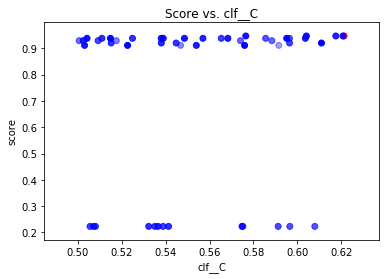

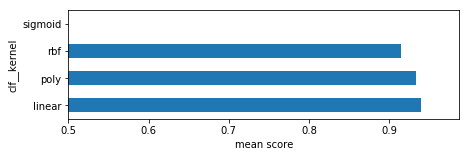

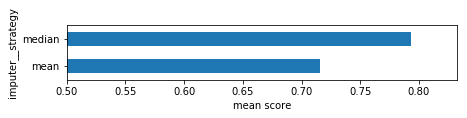

In [33]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot_search_details(table):
    param_cols = [c for c in table.columns 
                  if c not in {'mean_fit_time', 'mean_score_time', 'mean_test_score',
                               'std_fit_time', 'std_score_time', 'std_test_score'}]

    # cols used for y-axis and marker sizing
    scores = table['mean_test_score']
    score_sd = table['std_test_score']
    fit_times = table['mean_fit_time']
    x_axis = np.arange(table.shape[0])

    # set alpha, scale between 0 and 1
    # https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range
    min_fit = fit_times.min()
    max_fit = fit_times.max()
    alpha = 1 - ((fit_times - min_fit) / (max_fit - min_fit))

    # set colors
    rgba_colors = np.zeros((len(x_axis), 4))
    # for blue the B column needs to be one
    rgba_colors[:, 2] = 1.0
    # the fourth column needs to be the alphas
    rgba_colors[:, 3] = alpha
    # the best model should be red, not blue
    rgba_colors[0, 0] = 1.0
    rgba_colors[0, 2] = 0.0

    for param in param_cols:
        col = table[param]

        # continuous params get a scatter plot
        try:
            col = col.astype(np.float)

            plt.scatter(col, scores, c=rgba_colors)
            plt.xlabel(param)
            plt.ylabel("score")
            plt.title("Score vs. %s" % param)

            plt.show()

        # otherwise they get a bar graph
        except ValueError:
            cat_plot = scores.groupby(col).mean()
            cat_plot.sort_values()
            cat_plot.plot(kind="barh", xlim=(.5, None), figsize=(7, cat_plot.shape[0] / 2))
            plt.xlabel("mean score")

            plt.show()
            
# plot the details for the SVM
plot_search_details(svm_table)

# Evaluate results

Now we can introduce the holdout set to each optimized model to select our ultimate, "best" model that will be used.

In [ ]:
from sklearn.metrics import accuracy_score

rf_preds = rf_search.predict(X_test)
svm_preds = svm_search.predict(X_test)

print("RF test score: %.5f" % accuracy_score(y_test, rf_preds))
print("SVM test score: %.5f" % accuracy_score(y_test, svm_preds))

# Model persistence

At this point, you have spent a considerable amount of time putting together a modeling pipeline that will handle your raw data and feed it through to your estimator. You've even cross-validated and tuned the model to make sure you get the best one possible.

__*What next?*__

It's time to persist our model to disk! Scikit-learn allows us to easily pickle the entire modeling pipeline

In [ ]:
from sklearn.externals import joblib
import os

# if it's already there, get rid of it
otpt_file = 'iris.pkl'
if os.path.exists(otpt_file):
    os.unlink(otpt_file)

# dump the model into a pickle file
joblib.dump(svm_search, otpt_file, compress=3)
assert os.path.exists(otpt_file)

Once the model is on disk, we can easily load and generate predictions like so:

In [ ]:
joblib.load(otpt_file).predict(X_test)[:5]

# Model deployment

Once your model has been persisted, the question arises: how do you deploy it? While the answer to this question is complex and beyond the scope of this course, we will demonstrate how to deploy behind a simple REST API endpoint using Flask.

### Instructions

- In a new terminal window, navigate to the [`course/`](./) directory
- Run the following:

```bash
$ source activate packt-ml
$ python iris_app.py <host> <port>
```

For the purposes of this demo, you can simply use "localhost" for host, and 5000 for port. Thus, your command would be:

```bash
$ python iris_app.py localhost 5000
```

In [ ]:
import requests
import os

# if you have a proxy...
os.environ['NO_PROXY'] = 'localhost'

# now, let's form a request:
url = "http://localhost:5000/"
res = requests.post(url, json={'data': [[None, 3.2, 1.3, None],
                                        [6.3 , 3.3, 4.7, 1.6 ]]})
res.json()